In [51]:
#!/usr/bin/env python
# coding: utf-8

# In[24]:


import networkx as nx
import community
from community import community_louvain
import numpy as np
import copy  
import matplotlib.pyplot as plt
import collections
import graph_ase_BNU
from sklearn.utils.extmath import randomized_svd
import collections
import lcc_BNU
from scipy.stats import binom_test

# In[17]:


def ase_graph(G): 
    sorted_vertex = sorted(G.nodes())
    A = nx.to_scipy_sparse_matrix(G, nodelist=sorted_vertex)
    n = G.number_of_nodes()
    max_dim = max_dim_ase
    
    svd_seed = 1234
    U, Sigma, VT = randomized_svd(A, 
                              n_components=min(max_dim, n - 1),
                              n_iter=50,
                              random_state=svd_seed)

    ##print ("dimension reduction (elbow selection)")
    #rank_graph =  getElbows_BNU.getElbows(Sigma, n_elbows=elb)
    
    #reduced_dim = rank_graph[(elb-1)]
    ##print ("elbow is %d" %reduced_dim)

    reduced_dim = 2 
    s_sqrt = np.sqrt(Sigma) 

    
    s_sqrt_dim_reduced = s_sqrt[:reduced_dim]
    U_dim_reduced = U[:, :reduced_dim ]
    VT_dim_reduced =VT[:reduced_dim, :]

    Xhat = np.multiply( s_sqrt_dim_reduced, U_dim_reduced)
    
    embedded_dict = {}
    for _, vertex in enumerate(sorted_vertex):
        embedded_dict[vertex] = Xhat[_, :]
     
    
    embedded = collections.namedtuple('embedded', 'Xhat vertex_labels dict')
    result = embedded(Xhat = Xhat, vertex_labels = sorted_vertex, dict = embedded_dict)
    
    return result

def sqdist(vector):
    return sum(x*x for x in vector)

def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_minmax(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        high_trim = sorted_degrees_desc[ctr][0]
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(high_trim)
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

#procrustes
def procrustes(A, B):
    tmp = A.T @ B
    U_tmp, Sigma_tmp, VT_tmp = np.linalg.svd(tmp)
    W = U_tmp @ VT_tmp
    return W
    #A@W - B
    
    
def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_minmax(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    while( ctr <= count_threshold):
        high_trim = sorted_degrees_desc[ctr][0]
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(high_trim)
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result


def degtrim_minpercent(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    while( ctr <= count_threshold):
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result


def degtrim_maxpercent(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    while( ctr <= count_threshold):
        high_trim = sorted_degrees_desc[ctr][0]
        tmpG.remove_node(high_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

In [52]:
file_G0 = r'/Users/z/Desktop/execs_email_t108.txt'
file_G1 = r'/Users/z/Desktop/execs_email_t110.txt'


G0 = nx.read_weighted_edgelist(file_G0, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')
G1 = nx.read_weighted_edgelist(file_G1, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')




print(G0.size())
print(G0.number_of_nodes())
print(G1.size())
print(G1.number_of_nodes())



136
88
141
88


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


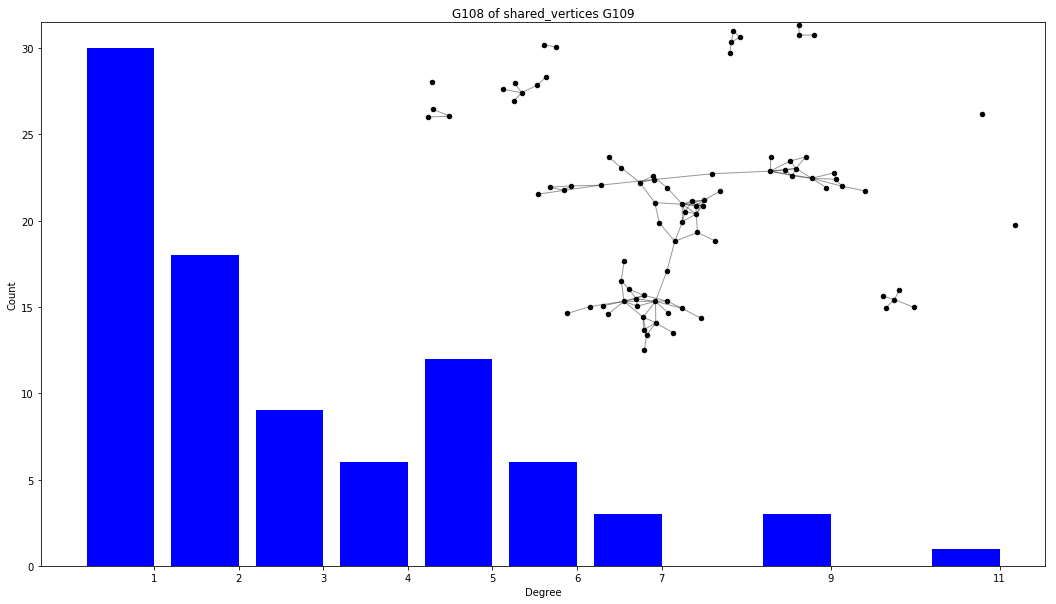

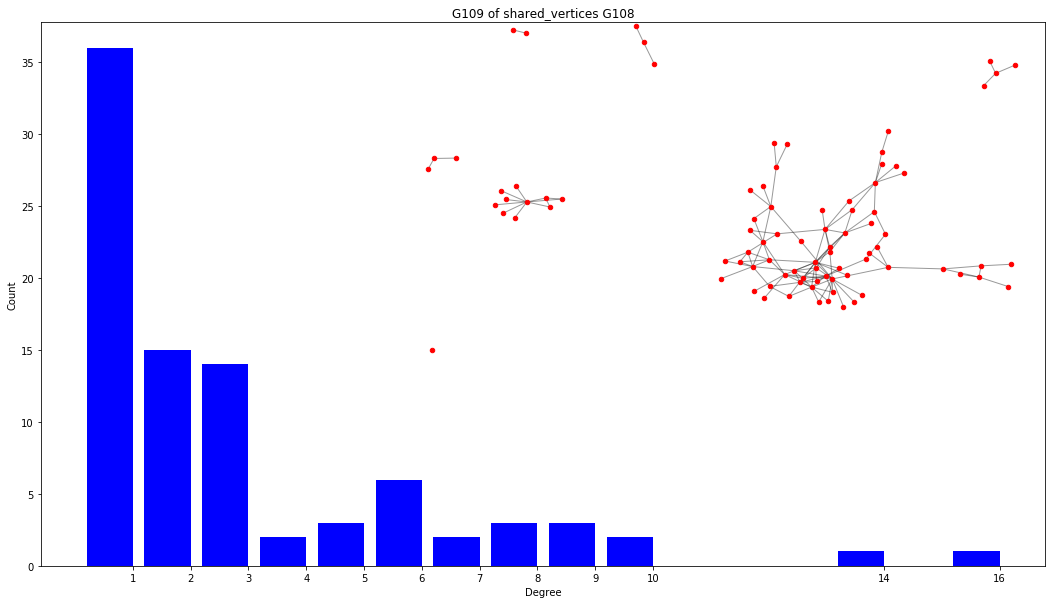

In [53]:



G = G0

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("G108 of shared_vertices G109")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()



G = G1

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("G109 of shared_vertices G108")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [9]:
pd = [[] for _ in range(3)]

pd[0].append(1)
pd[0].append(3)
pd

[[1, 3], [], []]

In [44]:
count_threshold

44

In [54]:
Graph.number_of_nodes()

43

In [47]:
G1.number_of_nodes()

88

In [195]:
percent_threshold_min = [0, 0.01, 0.02, 0.03, 0.04, 0.08, 0.1, 0.13, 0.16, 0.2, 0.3, 0.4]
percent_threshold_max = [0, 0.01, 0.02, 0.03, 0.04, 0.08, 0.1, 0.13, 0.16, 0.2, 0.3, 0.4]


p_values =  [[] for i in range(len(percent_threshold_min))]
graphs_modularity =  [[] for i in range(len(percent_threshold_min))]
idx = 0

for percent_min in percent_threshold_min :
    Gtrim_mod = degtrim_minpercent(G1, percent_min)
    G_trimmed_min = Gtrim_mod.G
    print(Gtrim_mod.mod)
    #G_trimmed_max = G_trimmed_min
    for percent in percent_threshold_max :
        Gtrim_mod = degtrim_maxpercent(G_trimmed_min, percent)
        G_trimmed_max = Gtrim_mod.G
        graphs_modularity[idx].append(Gtrim_mod.mod) 
        
        G1_Trimmed = G_trimmed_max
        max_dim_ase = 2
        ase_G0 = ase_graph(G0)
        ase_G1 = ase_graph(G1)
        ase_G1_Trimmed = ase_graph(G1_Trimmed)
        
        intersecting_G0_noise =   set(G0.nodes()).intersection(set(G1.nodes()))
        intersecting_all3 =   list(set(intersecting_G0_noise).intersection(set(G1_Trimmed.nodes())))
        
        intersecting_index = []
        for v in intersecting_all3:
            intersecting_index.append(ase_G0.vertex_labels.index(v))
        XhatG0_shared = ase_G0.Xhat[intersecting_index]

        intersecting_index = []
        for v in intersecting_all3:
            intersecting_index.append(ase_G1.vertex_labels.index(v))
        XhatG1_shared = ase_G1.Xhat[intersecting_index]

        intersecting_index = []
        for v in intersecting_all3:
            intersecting_index.append(ase_G1_Trimmed.vertex_labels.index(v))
        XhatG1_Trimmed_shared = ase_G1_Trimmed.Xhat[intersecting_index]



        #procrustes
        W_G1_G0 = procrustes(XhatG1_shared, XhatG0_shared)
        XhatG1_shared_proj = XhatG1_shared@W_G1_G0 


        W_G1_Trimmed_G0 = procrustes(XhatG1_Trimmed_shared, XhatG0_shared)
        XhatG1_Trimmed_shared_proj = XhatG1_Trimmed_shared@W_G1_Trimmed_G0 

        
        rank_trim = []
        rank_noise = []
     

        for j in range(XhatG0_shared.shape[0]):
            distance_to_noisy = XhatG1_shared_proj - XhatG0_shared[j,]
            diff_G1_G0v = np.linalg.norm(distance_to_noisy, axis=1)
            distance_to_trim = XhatG1_Trimmed_shared_proj - XhatG0_shared[j,]
            diff_G1_Trimmed_G0v = np.linalg.norm(distance_to_trim, axis=1)
            rank_trim.append(diff_G1_Trimmed_G0v.argsort()[0]) 
            rank_noise.append(diff_G1_G0v.argsort()[0])
            
        delta_rank = np.array(rank_noise) - np.array(rank_trim)

        
        delta_rank_sign = delta_rank
        delta_rank_sign[delta_rank_sign < 0] = 0
        delta_rank_sign[delta_rank_sign > 0] = 1
   
        p_values[idx].append(binom_test(sum(delta_rank_sign), len(delta_rank_sign), p=0.5, alternative='greater')) 


    idx +=1

0.6526785714285713
0.6526785714285713
0.6484912789193106
0.6484912789193106
0.6443236714975845
0.6322399198039652
0.6287240658036067
0.6170710059171597
0.6146382292764586
0.6064321019771072
0.5911153119092628
0.5411178355286578


In [112]:
# Qlowp_index = [[] for i in range(len(percent_threshold_min))]
# Qlowp_values = [[] for i in range(len(percent_threshold_min))]

# idx = 0 
# print(graphs_modularity[idx])
# print (p_values[idx])    

# p_idx = p_values[idx]
# index = [i for i,v in enumerate(p_idx) if v <0.05]
# for j in index:
#     Qlowp_index[idx].append(j)
#     Qlowp_values[idx].append(graphs_modularity[idx][j])

# print( Qlowp_index)
# print(Qlowp_values)

[0.7045439999999998, 0.7045439999999998, 0.7417490433673468, 0.7612875860118767, 0.7776731301939057, 0.7758381273556835, 0.8139902326917552, 0.8175645088275239, 0.8265913146936346, 0.8954081632653059, 0.8927335640138407, 0.8599999999999999]
[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[[7, 8, 9, 10], [], [], [], [], [], [], [], [], [], [], []]
[[0.8175645088275239, 0.8265913146936346, 0.8954081632653059, 0.8927335640138407], [], [], [], [], [], [], [], [], [], [], []]


In [196]:
p_values_ref = p_values
graphs_modularity_ref = graphs_modularity

print(p_values_ref[0])
print(graphs_modularity_ref[0])

[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[0.7045439999999998, 0.7045439999999998, 0.7417490433673468, 0.7612875860118767, 0.7776731301939057, 0.7758381273556835, 0.8139902326917552, 0.8175645088275239, 0.8265913146936346, 0.8954081632653059, 0.8927335640138407, 0.8599999999999999]


[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[nan, nan, nan, nan, nan, nan, nan, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, nan]


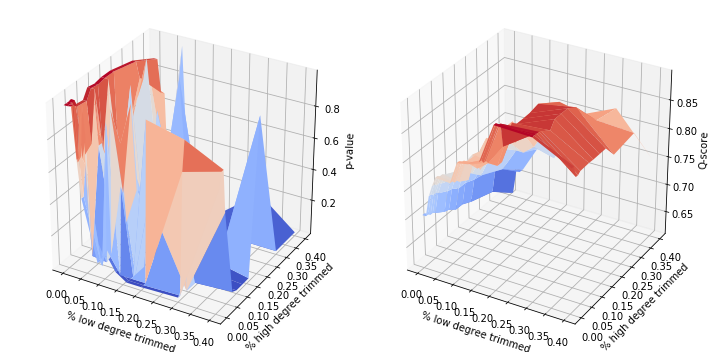

In [227]:
p_array_ref = np.asarray(p_values_ref)
mod_array_ref = np.asarray(graphs_modularity_ref)
p_array.shape



x = percent_threshold_min
y = percent_threshold_max

X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, p_array_ref, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, mod_array_ref, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');

plt.tight_layout()
#only plot Q-scores of low p-values 


In [228]:
for idx in range(len(graphs_modularity)):
    p_idx = p_values[idx]
    index = [i for i,v in enumerate(p_idx) if v >0.05]
    for j in index:
        graphs_modularity_lowp[idx][j] = np.nan
        p_values_lowp[idx][j] = np.nan
        
print(p_values[0])
print(p_values_ref[0])
print(p_values_lowp[0])

[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, 0.7388013097515799]
[nan, nan, nan, nan, nan, nan, nan, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, nan]


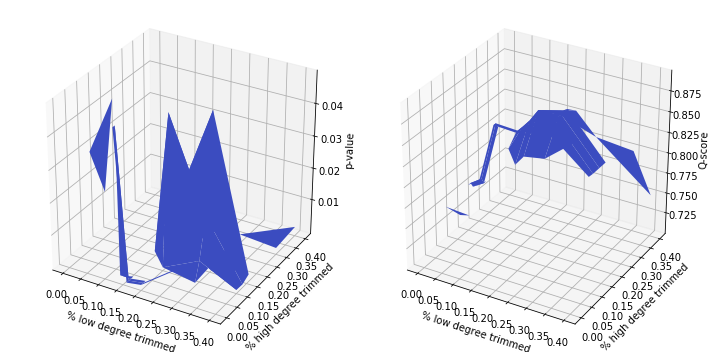

In [230]:
p_array_lowp = np.asarray(p_values_lowp)
mod_array_lowp = np.asarray(graphs_modularity_lowp)
p_array.shape


x = percent_threshold_min
y = percent_threshold_max

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, p_array_lowp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, mod_array_lowp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');

plt.tight_layout()



In [231]:
p_values_highp = p_values
graphs_modularity_highp = graphs_modularity
idx = 0 
   
for idx in range(len(graphs_modularity)):
    p_idx = p_values[idx]
    index = [i for i,v in enumerate(p_idx) if v <=0.05]
    for j in index:
        graphs_modularity_highp[idx][j] = np.nan
        p_values_highp[idx][j] = np.nan




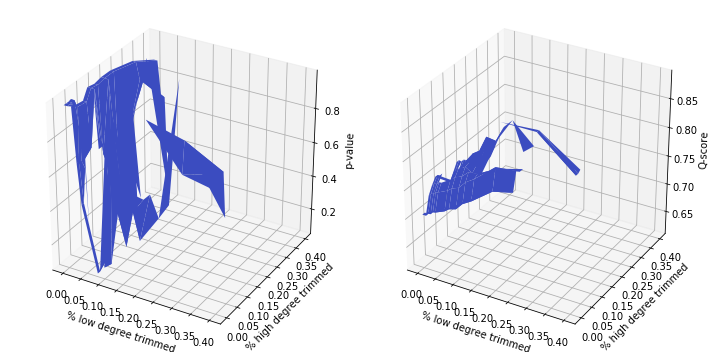

In [234]:
p_array_highp = np.asarray(p_values_highp)
mod_array_highp = np.asarray(graphs_modularity_highp)
p_array.shape


x = percent_threshold_min
y = percent_threshold_max

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, p_array_highp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, mod_array_highp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');


plt.tight_layout()

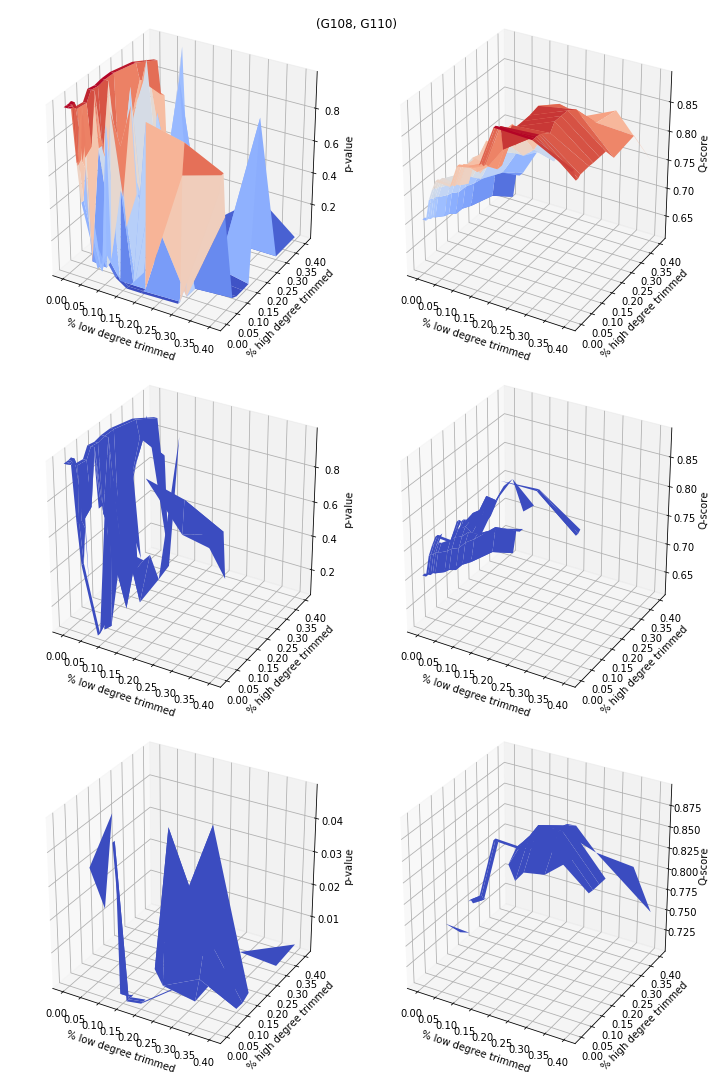

In [243]:

x = percent_threshold_min
y = percent_threshold_max

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,15))


ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.plot_surface(X, Y, p_array_ref, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.plot_surface(X, Y, mod_array_ref, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');


ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.plot_surface(X, Y, p_array_highp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot_surface(X, Y, mod_array_highp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');

ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.plot_surface(X, Y, p_array_lowp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')
ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('p-value');

ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.plot_surface(X, Y, mod_array_lowp, rstride=1, cstride=1,cmap='coolwarm',edgecolor='none')

ax.set_xlabel('% low degree trimmed')
ax.set_ylabel('% high degree trimmed')
ax.set_zlabel('Q-score');

plt.suptitle("(G108, G110)")
plt.tight_layout()


In [246]:
fname="/Users/z/Desktop/G108_G110.png"
fig.savefig(fname, bbox_inches="tight")

In [247]:
print(p_values_lowp[0])

[nan, nan, nan, nan, nan, nan, nan, 0.0462304905364619, 7.85130887734353e-09, 0.000748129442696754, 0.009311918307503214, nan]


In [248]:
print(p_values_ref[0])

[0.9957227307486533, 0.9957227307486533, 0.9999169790896985, 0.684771754106601, 0.4517986728417566, 0.06801619743894599, 0.1567515266482263, nan, nan, nan, nan, 0.7388013097515799]


Text(0.5, 0, 'modularity')

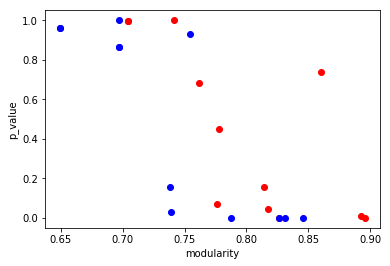

In [128]:
fig = plt.figure()

ax = plt.axes()
ax.plot(graphs_modularity[0], p_values[0], 'ro')
ax.plot(graphs_modularity[10], p_values[10], 'bo')
ax.set_ylabel("p_value")
ax.set_xlabel("modularity")

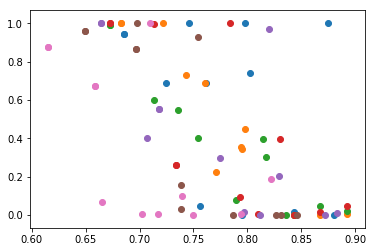

In [120]:
for idx in range(5, len(percent_threshold_max)):
    plt.scatter(graphs_modularity[idx], p_values[idx])

[0.6526785714285713]
[0.7064436885865457, 0.7431670451875636, 0.7661335059171598, 0.7413296398891966, 0.7444180208746204]
88
5


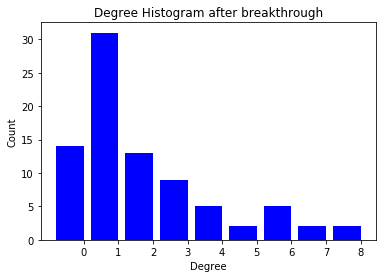

In [4]:
  
    
########
#experience:
 #########
    
G1_Trimmed_min = G1    
    
    
print (graphs_modularity4)

graphs_modularity5 = []


G_trimmed_new = G1_Trimmed_min
for percent in percent_threshold2 :
    Gtrim_mod = degtrim_maxpercent(G_trimmed_new, percent)
    G_trimmed_new = Gtrim_mod.G
    graphs_modularity5.append(Gtrim_mod.mod) 
G1_Trimmed = G_trimmed_new

print (graphs_modularity5)


degree_sequence = sorted([d for n, d in G1_Trimmed.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram after breakthrough")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


print(G1.number_of_nodes())

print(G1.number_of_nodes() - G1_Trimmed.number_of_nodes())

In [402]:

# fig, ax = plt.subplots(figsize=(30,10))

# plt.title("Gnoise_lcc")

# plt.subplot(1, 3, 1)
# G0_lcc = lcc_BNU.extract_lcc(G0)
# pos = nx.spring_layout(G0_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G0_lcc, pos, node_size=20, node_color='blue')
# nx.draw_networkx_edges(G0_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G0_lcc, pos)

# plt.subplot(1, 3, 2)
# G1_lcc = lcc_BNU.extract_lcc(G1)

# pos = nx.spring_layout(G1_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G1_lcc, pos, node_size=20, node_color='red')
# nx.draw_networkx_edges(G1_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G1_lcc, pos)

# plt.subplot(1, 3, 3)

# G1_Trimmed_lcc = lcc_BNU.extract_lcc(G1_Trimmed)
# pos = nx.spring_layout(G1_Trimmed_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G1_Trimmed_lcc, pos, node_size=20, node_color = 'green',  with_labels = True)
# nx.draw_networkx_edges(G1_Trimmed_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G1_Trimmed_lcc, pos)

# plt.show()

In [403]:
max_dim_ase = 2

ase_G0 = ase_graph(G0)
ase_G1 = ase_graph(G1)
ase_G1_Trimmed = ase_graph(G1_Trimmed)





print(set(G1.nodes()) - set(G1_Trimmed.nodes()))
#note here trimming only trimmed nodes that were common in both G0 and G1
#remember to do procrustes!!!!! 

intersecting_G0_noise =   set(G0.nodes()).intersection(set(G1.nodes()))
intersecting_all3 =   list(set(intersecting_G0_noise).intersection(set(G1_Trimmed.nodes())))

print(len(intersecting_G0_noise))
print(len(intersecting_all3))

{'33', '169', '27', '153', '146'}
73
68


In [404]:
intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G0.vertex_labels.index(v))
XhatG0_shared = ase_G0.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G1.vertex_labels.index(v))
XhatG1_shared = ase_G1.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G1_Trimmed.vertex_labels.index(v))
XhatG1_Trimmed_shared = ase_G1_Trimmed.Xhat[intersecting_index]

In [405]:
#procrustes
W_G1_G0 = procrustes(XhatG1_shared, XhatG0_shared)
XhatG1_shared_proj = XhatG1_shared@W_G1_G0 


W_G1_Trimmed_G0 = procrustes(XhatG1_Trimmed_shared, XhatG0_shared)
XhatG1_Trimmed_shared_proj = XhatG1_Trimmed_shared@W_G1_Trimmed_G0 


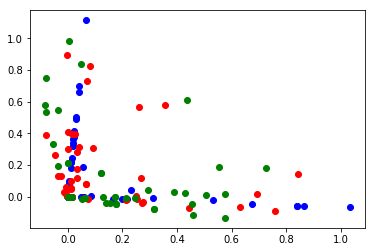

In [406]:
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 
diff_G0_G1 = np.linalg.norm(Xhat_G0_G1, axis=1)
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 


plt.plot(XhatG0_shared[:,0], XhatG0_shared[:,1], 'bo')
plt.plot(XhatG1_shared_proj [:,0], XhatG1_shared_proj [:,1], 'ro')
plt.plot(XhatG1_Trimmed_shared_proj [:,0], XhatG1_Trimmed_shared_proj [:,1], 'go')

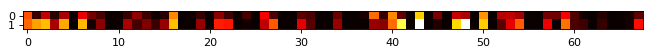

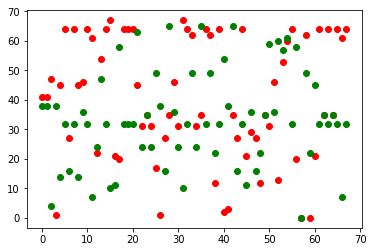

In [407]:
Xhat_G0_G1_Trimmed = XhatG0_shared - XhatG1_Trimmed_shared_proj 
diff_G0_G1_Trimmed = np.linalg.norm(Xhat_G0_G1_Trimmed, axis=1)
#diff_G0_G1_Trimmed
a = np.array(diff_G0_G1)
b = np.array(diff_G0_G1_Trimmed)
m = np.vstack((a,b))
#m1 = np.asmatrix(m)
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()
#black means small number


# In[46]:


rank_trim = []
rank_noise = []

idx = 1 

for idx in range(XhatG0_shared.shape[0]):
    distance_to_noisy = XhatG1_shared_proj - XhatG0_shared[idx,]
    diff_G1_G0v = np.linalg.norm(distance_to_noisy, axis=1)
    distance_to_trim = XhatG1_Trimmed_shared_proj - XhatG0_shared[idx,]
    diff_G1_Trimmed_G0v = np.linalg.norm(distance_to_trim, axis=1)
    rank_trim.append(diff_G1_Trimmed_G0v.argsort()[0]) 
    rank_noise.append(diff_G1_G0v.argsort()[0])


delta_rank = np.array(rank_noise) - np.array(rank_trim)


# In[47]:


plt.plot(np.array(rank_noise), 'ro')
plt.plot(np.array(rank_trim), 'go')


# In[292]:

In [408]:
delta_rank_sign = delta_rank
delta_rank_sign[delta_rank_sign < 0] = 0
delta_rank_sign[delta_rank_sign > 0] = 1
#binom.test(sum(delta_rank_sign), length(delta_rank_sign))
#=0.01 

In [409]:
delta_rank_sign 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1])

In [410]:
print(len(delta_rank_sign ))
binom_test(sum(delta_rank_sign), len(delta_rank_sign), p=0.5, alternative='greater') 

68


0.03405933714204983

In [411]:
#G109, 108:2.6343376590645844e-06
#percent_threshold = [0.01, 0.02, 0.05] #G109 
#percent_threshold2 = [0.01, 0.2, 0.03, 0.04] #G109

#binom_test(sum(delta_rank_sign), len(delta_rank_sign), p=0.5, alternative='greater') #:0.98

In [242]:

#G107, 108: 0.0163828
#percent_threshold = [0.01] #G107
#percent_threshold2 = [0.01, 0.2, 0.03, 0.04] #G107
#

In [ ]:
#G106, 108: 0.0337
#percent_threshold = [0.01] #G106
#percent_threshold2 = [0.01, 0.2, 0.03, 0.04, 0.05, 0.08, 0.1, 0.13, 0.16, 0.2, 0.3] #G106

In [ ]:
#G110, 108: 0.049
                     
#percent_threshold = [0.01] #G110
#percent_threshold2 = [0.01, 0.2, 0.03, 0.04, 0.08, 0.1, 0.13, 0.16, 0.2, 0.3] #G110
